In [4]:
'''
1. 측정 시간별로 정렬된 데이터를 받는다
2. ef_hour의 개수만큼 time step로 자른다
3. zero padding 하여 길이를 같게 한다(대부분 길이 20)
'''

import pandas as pd
import numpy as np
data_df = pd.read_csv('sequential.csv')
columns_drop = ['label','class_interval','Unnamed: 0']
data_df = data_df.drop(columns = columns_drop)
split_datasets = {station: data_df[data_df['stn4contest'] == station] for station in data_df['stn4contest'].unique()}

grouped_counts = data_df.groupby(['stn4contest','ef_year', 'ef_month', 'ef_day', 'ef_hour']).size()
# Reset index to turn the Series into a DataFrame (if desired)
grouped_counts = grouped_counts.reset_index(name='count')
# Display the result
print(grouped_counts['count'])

0        1
1        1
2        1
3        1
4        2
        ..
77518    2
77519    1
77520    1
77521    1
77522    1
Name: count, Length: 77523, dtype: int64


In [5]:
start_idx = 0
xs = []
ys = []

for i in grouped_counts['count']:
    seq_length = i
    end_idx = start_idx + seq_length
    if end_idx <= len(data_df):
        x = data_df.iloc[start_idx:end_idx].drop(columns = ['stn4contest','ef_year','vv'], axis=1).values
        y = data_df.iloc[end_idx - 1]['vv']
        xs.append(x)
        ys.append(y)
    start_idx = end_idx

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score, f1_score

def zero_padding(xs):
    # Find the length of the longest sequence
    max_seq_length = max(len(seq) for seq in xs)
    # Pad sequences with zeros to make them all the same length
    padded_sequences = pad_sequences(xs, maxlen=max_seq_length, dtype='float32', padding='post')

    return padded_sequences

In [8]:
import pandas as pd
import numpy as np
import smogn

In [9]:
'''
1. 길이를 같게 zero padding 한다
2. SMOTE를 이용해서 OVERSAMPLING 한다 (0 class 포함)

'''

xs = np.array(zero_padding(xs))
ys = np.array(ys)

xs = np.array(xs)
ys = np.array(ys)

In [87]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
encoder = OneHotEncoder(sparse=False)
x_train, x_test, y_train, y_test = train_test_split(xs, ys, test_size=0.2, random_state=42,shuffle = True)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [11]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(20, 13)))
model.add(Dense(1, activation='linear'))  # Output layer with 9 units for multi-class classification

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae','mse'])

In [29]:
def classification(vv_pred):
    vv_pred[vv_pred < 0] = 0
    vv_pred[(vv_pred > 0) & (vv_pred < 0.2)] = 1
    vv_pred[(vv_pred >= 0.2) & (vv_pred < 0.5)] = 2
    vv_pred[(vv_pred >= 0.5) & (vv_pred < 1)] = 3
    vv_pred[(vv_pred >= 1) & (vv_pred < 2)] = 4
    vv_pred[(vv_pred >= 2) & (vv_pred < 5)] = 5
    vv_pred[(vv_pred >= 5) & (vv_pred < 10)] = 6
    vv_pred[(vv_pred >= 10) & (vv_pred < 20)] = 7
    vv_pred[(vv_pred >= 20) & (vv_pred < 30)] = 8
    vv_pred[(vv_pred >= 30)] = 9
    return vv_pred

Class interval을 수치로 regression 해보자

In [129]:
import pandas as pd
import numpy as np
data_df = pd.read_csv('sequential.csv')
columns_drop = ['label','vv','Unnamed: 0']
data_df = data_df.drop(columns = columns_drop)
split_datasets = {station: data_df[data_df['stn4contest'] == station] for station in data_df['stn4contest'].unique()}

grouped_counts = data_df.groupby(['stn4contest','ef_year', 'ef_month', 'ef_day', 'ef_hour']).size()

# Reset index to turn the Series into a DataFrame (if desired)
grouped_counts = grouped_counts.reset_index(name='count')

# Display the result
print(grouped_counts['count'])

0        1
1        1
2        1
3        1
4        2
        ..
77518    2
77519    1
77520    1
77521    1
77522    1
Name: count, Length: 77523, dtype: int64


In [130]:
start_idx = 0
xs = []
ys = []

for i in grouped_counts['count']:
    seq_length = i
    end_idx = start_idx + seq_length
    if end_idx <= len(data_df):
        x = data_df.iloc[start_idx:end_idx].drop(columns = ['class_interval','stn4contest','ef_year'], axis=1).values
        y = data_df.iloc[end_idx - 1]['class_interval']
        xs.append(x)
        ys.append(y)
    start_idx = end_idx

In [131]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [132]:
def zero_padding(xs):
    # Find the length of the longest sequence
    max_seq_length = max(len(seq) for seq in xs)
    # Pad sequences with zeros to make them all the same length
    padded_sequences = pad_sequences(xs, maxlen=max_seq_length, dtype='float32', padding='post')
    return padded_sequences

In [133]:
xs = np.array(zero_padding(xs))
ys = np.array(ys)

xs = np.array(xs)
ys = np.array(ys)
# Reshape xs to 2D array for SMOTE
num_samples, seq_length, num_features = xs.shape
xs_reshaped = xs.reshape(num_samples, seq_length * num_features)

# Apply SMOTE
smote = SMOTE()
xs_resampled, ys_resampled = smote.fit_resample(xs_reshaped, ys)

# Reshape back to 3D array for LSTM
xs_resampled = xs_resampled.reshape(-1, seq_length, num_features)

# Verify shapes
print("Original shape:", xs.shape)
print("Resampled shape:", xs_resampled.shape)

Original shape: (77523, 20, 13)
Resampled shape: (655370, 20, 13)


In [134]:
# class 0은 빼자 => binary classification으로 풀기
xs_resampled = xs_resampled[ys_resampled>0]
ys_resampled = ys_resampled[ys_resampled>0]

In [135]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
x_train, x_test, y_train, y_test = train_test_split(xs_resampled, ys_resampled, test_size=0.2, random_state=42,shuffle = True)

In [159]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization

model = Sequential()

model.add(LSTM(128, activation='relu', return_sequences=True, input_shape=(20, 13)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(LSTM(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Dense layers
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

Epoch 1/100
11797/11797 [==============================] - 332s 28ms/step - loss: 7.3566 - mse: 7.3566 - val_loss: 6.6271 - val_mse: 6.6271
Epoch 2/100
11797/11797 [==============================] - 344s 29ms/step - loss: 4.8013 - mse: 4.8013 - val_loss: 4.1217 - val_mse: 4.1217
Epoch 3/100
11797/11797 [==============================] - 328s 28ms/step - loss: 3.3846 - mse: 3.3846 - val_loss: 6.4335 - val_mse: 6.4335
Epoch 4/100
11797/11797 [==============================] - 309s 26ms/step - loss: 3.1693 - mse: 3.1693 - val_loss: 3.0295 - val_mse: 3.0295
Epoch 5/100
11797/11797 [==============================] - 308s 26ms/step - loss: 3.0979 - mse: 3.0979 - val_loss: 2.5988 - val_mse: 2.5988
Epoch 6/100
11797/11797 [==============================] - 321s 27ms/step - loss: 3.0088 - mse: 3.0088 - val_loss: 2.7140 - val_mse: 2.7140
Epoch 7/100
11797/11797 [==============================] - 330s 28ms/step - loss: 3.0102 - mse: 3.0102 - val_loss: 2.5729 - val_mse: 2.5729
Epoch 8/100
11797/11

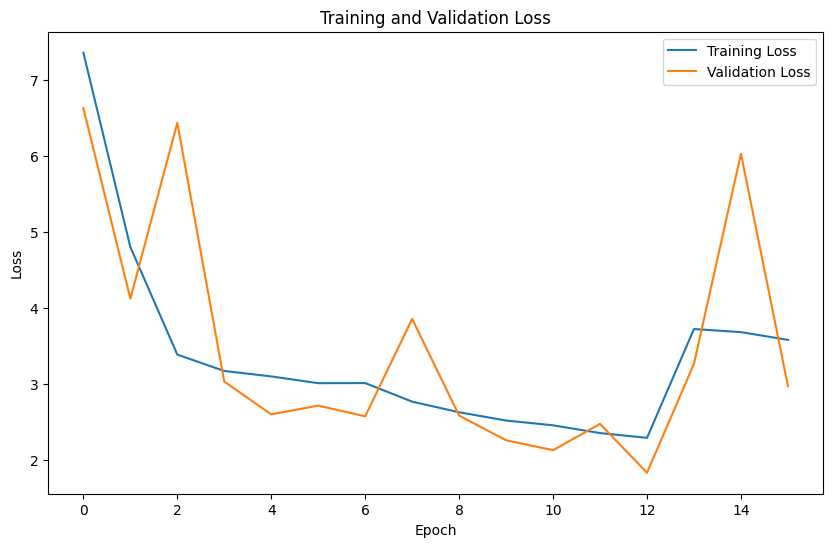

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
# epoch 10이 best
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [151]:
x_train.shape

(471866, 20, 13)

In [173]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score, f1_score
y_pred = model.predict(x_test)

3687/3687 [==============================] - 34s 9ms/step


In [174]:
y_pred[y_pred<1]=1
y_pred[y_pred>9]=9
y_pred = np.round(y_pred)

In [179]:
y_pred = y_pred.astype(int)

In [188]:
y_pred = y_pred.flatten()

In [189]:
y_pred

array([8, 2, 8, ..., 7, 5, 8])

In [190]:
y_test

array([9, 4, 8, ..., 8, 4, 6], dtype=int64)

Confusion Matrix:
[[  75 3601 7823 1347  204   72   27    3    0]
 [  34 2154 7754 2337  471  186   69   51    1]
 [  15 1145 7006 3745  899  315   77   17    0]
 [   2  472 5299 4582 1933  637  189   57    0]
 [   1  127 2700 4289 3461 1728  530  220    1]
 [   0   30  768 2186 3384 4150 1838  701    4]
 [   0    2  270  900 1803 4053 3832 2387   19]
 [   0    0   64  265  516 1246 3873 6837   95]
 [   0    0   12  114  164  354 1577 9815 1052]]
Accuracy: 0.2810023142065154
F1 Score: 0.2514331080031297


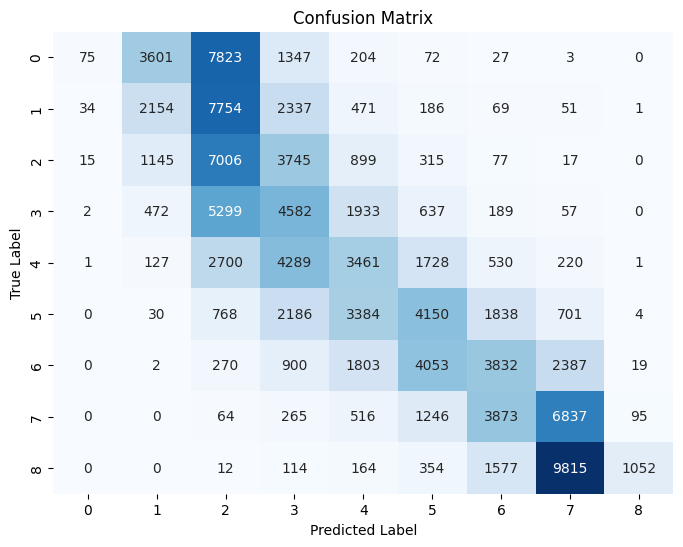

In [191]:
# Convert probabilities to binary class labels
# Calculate F1 score
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)
print("F1 Score:", f1)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()